# Customer Churn

Customers have started leaving "Beta Bank." Every month. Not many, but noticeably. Bank marketers calculated: retaining current customers is cheaper than attracting new ones.

It is necessary to forecast whether a customer will leave the bank in the near future or not. We are provided with historical data on customer behavior and contract terminations with the bank.

Build a model with the highest possible F1 score. To successfully complete the project, we need to achieve a metric of 0.59. Check the F1 score on the test set yourself.

Additionally, measure the AUC-ROC, compare its value with the F1 score.

Data source: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Research plan:
1. Open the data file, the file path: '/datasets/Churn.csv'.
2. Split the raw data into training and validation sets.
3. Examine the class balance, train the model without considering class imbalance. Briefly summarize the research findings.
4. Improve the model's quality, taking into account the class imbalance. Train different models and find the best one.
5. Conduct final testing.
6. Data should meet the following parameters.

Features:

- RowNumber — index of the row in the data
- CustomerId — unique customer identifier
- Surname — last name
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — number of years the person has been a customer of the bank
- Balance — account balance
- NumOfProducts — number of bank products used by the customer
- HasCrCard — presence of a credit card
- IsActiveMember — customer's activity
- EstimatedSalary — estimated salary

Target feature:
- Exited — customer churn status

## Data preparation

To begin with, import all the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, auc, precision_score, recall_score

In [2]:
data = pd.read_csv('/Users/daniyardjumaliev/Jupyter/Projects/datasets/Churn.csv')

display(data)
display(data.describe())
display(data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

_Conclusion_: Overall, the data is of sufficient quality without outliers. The exception is in the "Tenure" column, which represents the number of years a person has been a customer of the bank, where there are missing values. Almost 9% of all data. Let's remove these rows.

In [3]:
median = data['Tenure'].median()
data['Tenure'] = data['Tenure'].fillna(median)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

### Split the data into samples.

In our table, there are both categorical and quantitative types of data. Let's distinguish them.

In [4]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

Now let's create a variable with the training features and the target indicator. Also, let's get rid of unnecessary columns for training: 'RowNumber', 'CustomerId', and 'Surname'.

In [5]:
features = data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
target = data['Exited']

display(f'Train features: {features.shape}')
display(f'Target: {target.shape}')
display(features)
display(target)

'Train features: (10000, 10)'

'Target: (10000,)'

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Let's split the samples into validation, training, and test sets, with proportions of 20%, 60%, and 20%, respectively.

In [6]:
features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=12345)

print('Training features:', features_train.shape)
print('Validation features:', features_valid.shape)
print('Test features:', features_test.shape)
print()
print('Training target:', target_train.shape)
print('Validation target:', target_valid.shape)
print('Test target:', target_test.shape)

Training features: (6000, 10)
Validation features: (2000, 10)
Test features: (2000, 10)

Training target: (6000,)
Validation target: (2000,)
Test target: (2000,)


Let's perform One-Hot Encoding for categorical columns.

In [7]:
def ohe_conv(features):
    data_ohe = pd.get_dummies(features[categorical], columns=categorical, drop_first=True)
    
    data_ohe.rename(columns={
    'Geography_Germany': 'Germany',
    'Geography_Spain': 'Spain',
    'Gender_Male': 'Gender',
    'HasCrCard_1': 'HasCrCard',
    'IsActiveMember_1': 'IsActiveMember'
    }, inplace=True)
    
    data_ohe.reset_index(drop=True, inplace=True)
    return data_ohe

data_ohe_train = ohe_conv(features_train)
data_ohe_valid = ohe_conv(features_valid)
data_ohe_test = ohe_conv(features_test)

display(data_ohe_train)
display(data_ohe_valid)
display(data_ohe_test)

,Germany,Spain,Gender,HasCrCard,IsActiveMember
0,False,True,True,True,False
1,False,False,False,False,False
2,True,False,True,False,True
3,False,False,True,True,False
4,True,False,False,False,False
...,...,...,...,...,...
5995,False,False,True,False,True
5996,False,False,True,False,True
5997,False,False,False,False,True
5998,False,False,False,False,True


,Germany,Spain,Gender,HasCrCard,IsActiveMember
0,False,False,False,True,False
1,False,False,False,True,True
2,True,False,True,True,False
3,False,True,False,True,True
4,False,True,True,True,False
...,...,...,...,...,...
1995,False,False,False,False,True
1996,False,False,True,True,False
1997,False,False,False,False,True
1998,False,False,True,True,True


,Germany,Spain,Gender,HasCrCard,IsActiveMember
0,False,False,True,True,False
1,False,False,False,True,False
2,False,True,True,True,True
3,False,True,True,True,False
4,False,False,True,False,True
...,...,...,...,...,...
1995,True,False,True,True,False
1996,False,False,True,False,False
1997,False,False,False,True,False
1998,False,True,True,False,False


Let's scale the numerical variables.

In [8]:
scaler = StandardScaler()

data_train_scaled = scaler.fit_transform(features_train[numeric])
data_train_numeric = pd.DataFrame(data_train_scaled, columns=numeric)
data_train_numeric.reset_index(drop=True, inplace=True)

def scaler_func (features):
    data_scaled = scaler.transform(features[numeric])
    data_numeric = pd.DataFrame(data_scaled, columns=numeric)
    data_numeric.reset_index(drop=True, inplace=True)
    return data_numeric

data_valid_numeric = scaler_func(features_valid)
data_test_numeric = scaler_func(features_test)

display(f'Train: {data_train_numeric.shape}')
display(f'Validation: {data_valid_numeric.shape}')
display(f'Test: {data_test_numeric.shape}')

'Train: (6000, 6)'

'Validation: (2000, 6)'

'Test: (2000, 6)'

Let's combine the columns into a single dataframe.

In [9]:
features_train = pd.concat([data_train_numeric, data_ohe_train], axis=1)
features_valid = pd.concat([data_valid_numeric, data_ohe_valid], axis=1)
features_test = pd.concat([data_test_numeric, data_ohe_test], axis=1)
display(f'Train: {features_train.shape}')
display(f'Validation: {features_valid.shape}')
display(f'Test: {features_test.shape}')

'Train: (6000, 11)'

'Validation: (2000, 11)'

'Test: (2000, 11)'

Also, let's reset the indices in the target samples.

In [10]:
target_train.reset_index(drop=True, inplace=True)
target_valid.reset_index(drop=True, inplace=True)
target_test.reset_index(drop=True, inplace=True)

display(f'Train target: {target_train.shape}')
display(f'Valid target: {target_valid.shape}')
display(f'Test target: {target_test.shape}')

'Train target: (6000,)'

'Valid target: (2000,)'

'Test target: (2000,)'

## Researching the task.

Let's check the data for imbalance:

In [11]:
target.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

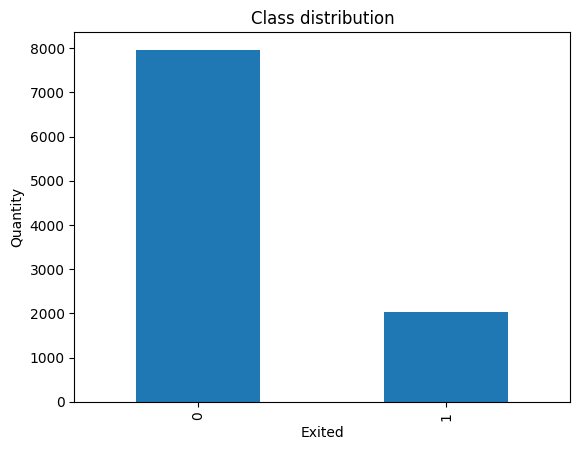

In [12]:
target.value_counts().plot(kind='bar')
plt.title('Class distribution')
plt.xlabel('Exited')
plt.ylabel('Quantity')
plt.show()

The data is imbalanced, the number of churned customers is approximately - 2037/10000 = 20% of the total.

Let's find the f1_score and auc_roc_score for logistic regression.

In [13]:
logistic_model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
logistic_model.fit(features_train, target_train)
logistic_predicted_valid = logistic_model.predict(features_valid)

probabilities_valid = logistic_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1: {f1_score(target_valid, logistic_predicted_valid)}')
print(f'auc_roc: {roc_auc_score(target_valid, probabilities_one_valid)}')

F1: 0.33108108108108103
auc_roc: 0.7587512627102753


_Conclusion_: The f1 score for logistic regression has a relatively low value around 0.33. But given the imbalanced nature of the data, this is expected.

Let's find the f1_score and auc_roc_score for the decision tree.

In [14]:
best_depth = 0
best_result = 0

for depth in range(1, 11):
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    tree_model.fit(features_train, target_train)
    predictions_valid = tree_model.predict(features_valid)
    result = tree_model.score(features_valid, target_valid)
    if result > best_result:
        best_result = result
        best_depth = depth

print(f'The quality of the decision tree on the validation set: {best_result}, max_depth: {best_depth}')

The quality of the decision tree on the validation set: 0.8585, max_depth: 6


In [15]:
tree_model = DecisionTreeClassifier(random_state=12345, max_depth=6)
tree_model.fit(features_train, target_train)
tree_predicted_valid = tree_model.predict(features_valid)

probabilities_valid = tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1: {f1_score(target_valid, tree_predicted_valid)}')
print(f'auc_roc: {roc_auc_score(target_valid, probabilities_one_valid)}')

F1: 0.5692541856925418
auc_roc: 0.8169690114263938


_Conclusion_: The f1 score for the decision tree has a higher value around 0.57. The AUC-ROC is 0.8169690114263938, suggesting that the model overall distinguishes well between classes.

Let's find the f1_score and auc_roc_score for the random forest.

In [16]:
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 110, 10):
    for depth in range (1, 15, 1):
        rand_forest_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rand_forest_model.fit(features_train, target_train)
        predictions_valid = rand_forest_model.predict(features_valid)
        result = rand_forest_model.score(features_valid, target_valid)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth

print(f'The quality of the random forest on the validation set: {best_result}, n_estimators: {best_est}, max_depth: {best_depth}')

The quality of the random forest on the validation set: 0.866, n_estimators: 50, max_depth: 10


In [17]:
rand_forest_model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10)
rand_forest_model.fit(features_train, target_train)
rand_forest_predicted_valid = rand_forest_model.predict(features_valid)

probabilities_valid = rand_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1: {f1_score(target_valid, rand_forest_predicted_valid)}')
print(f'auc_roc: {roc_auc_score(target_valid, probabilities_one_valid)}')

F1: 0.5902140672782875
auc_roc: 0.8488573606179568


_Conclusion_: The f1 score for the decision tree has a value around 0.59. The AUC-ROC is 0.8488573606179568, suggesting that the model overall distinguishes well between classes.

__Conclusion for all models with class imbalance__: The decision tree and random forest have higher f1 score and AUC-ROC values.

## Dealing with imbalance:

To begin with, let's try to balance the classes by including the hyperparameter class_weight='balanced'.

Let's find the f1_score and auc_roc_score for logistic regression with the hyperparameter class_weight='balanced'.

In [18]:
logistic_model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000, class_weight='balanced')
logistic_model.fit(features_train, target_train)
logistic_predicted_valid = logistic_model.predict(features_valid)

probabilities_valid = logistic_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1: {f1_score(target_valid, logistic_predicted_valid)}')
print(f'auc_roc: {roc_auc_score(target_valid, probabilities_one_valid)}')

F1: 0.4888507718696398
auc_roc: 0.7637310291013133


_Conclusion_: The f1 score for logistic regression increased by 0.16, and AUC-ROC remained unchanged.

Let's find the f1_score and auc_roc_score for the decision tree with the hyperparameter class_weight='balanced'.

In [19]:
tree_model = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced')
tree_model.fit(features_train, target_train)
tree_predicted_valid = tree_model.predict(features_valid)

probabilities_valid = tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1: {f1_score(target_valid, tree_predicted_valid)}')
print(f'auc_roc: {roc_auc_score(target_valid, probabilities_one_valid)}')

F1: 0.5581835383159887
auc_roc: 0.7996585389459167


_Conclusion_: Balancing classes using the class_weight hyperparameter for the decision tree reduced the f1 score and AUC-ROC by 0.1 and 0.2, respectively.

Let's find the f1_score and auc_roc_score for the random forest with the hyperparameter class_weight='balanced'.

In [20]:
rand_forest_model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10, class_weight='balanced')
rand_forest_model.fit(features_train, target_train)
rand_forest_predicted_valid = rand_forest_model.predict(features_valid)

probabilities_valid = rand_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1: {f1_score(target_valid, rand_forest_predicted_valid)}')
print(f'auc_roc: {roc_auc_score(target_valid, probabilities_one_valid)}')

F1: 0.62227602905569
auc_roc: 0.8504784688995217


_Conclusion_: Balancing classes using the class_weight hyperparameter for the random forest increased the f1 score by 0.03, and AUC-ROC remained unchanged.

Now let's try applying the "upsample" method. For this, we'll write a small function that takes samples and increases them by the required factor. We'll calculate the repeat factor for upsampling relative to the larger sample.

In [21]:
ratio = 2037/7963
ratio

0.25580811252040686

The ratio is 1 to 4, so we'll accept it.

In [22]:
repeat = 4

Let's write the upsample function:

In [23]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Now let's calculate the new values for the training set.

In [24]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Train models on these sets.

Logistic Regression

In [25]:
logistic_model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
logistic_model.fit(features_upsampled, target_upsampled)
logistic_predicted_valid = logistic_model.predict(features_valid)

probabilities_valid = logistic_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1: {f1_score(target_valid, logistic_predicted_valid)}')
print(f'auc_roc: {roc_auc_score(target_valid, probabilities_one_valid)}')

F1: 0.4888507718696398
auc_roc: 0.7636478565682107


_Conclusion_: The f1 score and AUC-ROC metrics remained unchanged.

Decision tree.

In [26]:
tree_model = DecisionTreeClassifier(random_state=12345, max_depth=6)
tree_model.fit(features_upsampled, target_upsampled)
tree_predicted_valid = tree_model.predict(features_valid)

probabilities_valid = tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1: {f1_score(target_valid, tree_predicted_valid)}')
print(f'auc_roc: {roc_auc_score(target_valid, probabilities_one_valid)}')

F1: 0.5609065155807366
auc_roc: 0.8043842510540228


_Conclusion_: The f1 score decreased by 0.02. AUC-ROC remained unchanged.

Random forest.

In [27]:
rand_forest_model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10)
rand_forest_model.fit(features_upsampled, target_upsampled)
rand_forest_predicted_valid = rand_forest_model.predict(features_valid)

probabilities_valid = rand_forest_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

print(f'F1: {f1_score(target_valid, rand_forest_predicted_valid)}')
print(f'auc_roc: {roc_auc_score(target_valid, probabilities_one_valid)}')

F1: 0.6157253599114064
auc_roc: 0.8490448768744064


_Conclusion_: The f1 score and AUC-ROC metrics remained unchanged.

__Overall conclusion after balancing the data__: The model with the highest f1 score is the Random Forest with a value of 0.62 when using the upsampled dataset.

## Model Testing

Let's test the Random Forest model on the test set.

In [28]:
rand_forest_model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10)
rand_forest_model.fit(features_upsampled, target_upsampled)
rand_forest_predicted_test = rand_forest_model.predict(features_test)

probabilities_test = rand_forest_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
roc_auc_score(target_test, probabilities_one_test)

print(f'F1: {f1_score(target_test, rand_forest_predicted_test)}')
print(f'auc_roc: {roc_auc_score(target_test, probabilities_one_test)}')

print(f'precision: {precision_score(target_test, rand_forest_predicted_test)}')
print(f'recall: {recall_score(target_test, rand_forest_predicted_test)}')

F1: 0.6132177681473456
auc_roc: 0.8544532740892649
precision: 0.566
recall: 0.6690307328605201


Let's plot a graph of feature importance for clarity.

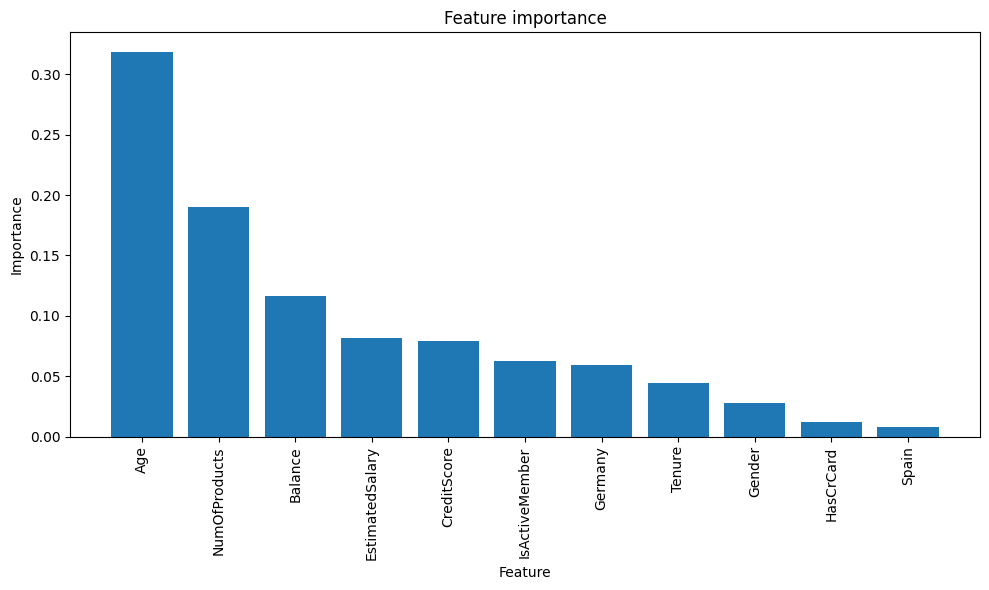

In [29]:
importances = rand_forest_model.feature_importances_
feature_names = features_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importance")
plt.bar(range(features_train.shape[1]), importances[indices], align="center")
plt.xticks(range(features_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

_Conclusion_: The f1 score showed a good value of 0.613, which is higher than the specified 0.59. The AUC-ROC metric value is 0.854, which can be considered a good indicator. In the first case, the f1 score is higher than the specified threshold, and the AUC-ROC value is close to 1. This means that the trained model has good potential in predicting the likelihood of a customer discontinuing the use of the bank's services.

Let's plot the ROC curve for this model.

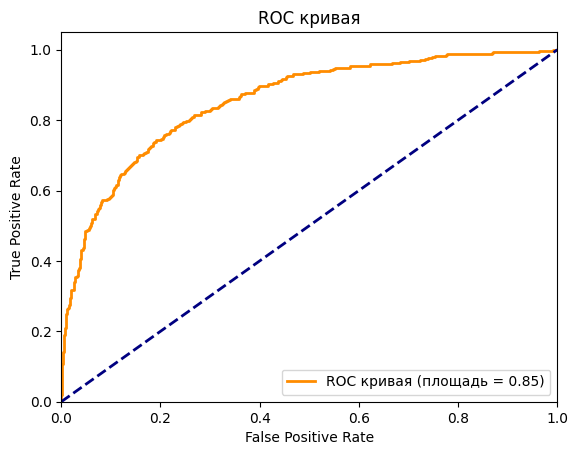

In [30]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

# Calculate the area under the AUC curve
roc_auc = auc(fpr, tpr)

# Plot the AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC кривая (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.legend(loc="lower right")
plt.show()

__GENERAL CONCLUSION__: 
- During the data loading stage, some missing data were identified and subsequently removed for the sake of analysis cleanliness.
- The data was then split into three sets - training, validation, and test sets, in the proportions of 60%, 20%, and 20%, respectively.
- Three models were used for training - logistic regression, decision tree, and random forest.
- During the data exploration stage, an imbalance was also identified in the target column 'Exited'.

__As a result of the study, it was determined that the best model for predicting the churn of existing customers is the random forest with the following hyperparameters - 50 trees, depth of 10, trained on upsampled data. It can be assumed that the model performs well in classification and has a high chance of predicting a successful outcome.__